# 第三章总结 分类问题

## 1. 准备数据

* 准备数据
 * 数据集初探
 * 不用清洗，不用特征工程
 * 分离测试集

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
# sklearn imports
from sklearn.model_selection import cross_val_predict, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [6]:
import pandas as pd
DATA_PATH = 'datasets/MNIST/'
def load_data(datapath=DATA_PATH):
    train_set = pd.read_csv(datapath+'mnist_train.csv', header=None, usecols=list(range(1,785)))
    train_label = pd.read_csv(datapath+'mnist_train.csv', header=None, usecols=[0])
    test_set = pd.read_csv(datapath+'mnist_test.csv', header=None, usecols=list(range(1,785)))
    test_label = pd.read_csv(datapath+'mnist_test.csv', header=None, usecols=[0])
    return train_set, test_set, train_label, test_label
train_set, test_set, train_label, test_label = load_data()

In [3]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 358.9 MB


In [4]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       60000 non-null  int64
dtypes: int64(1)
memory usage: 468.9 KB


In [5]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 59.8 MB


In [6]:
test_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [7]:
train_set.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_set.describe()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [7]:
X_train = train_set.values
y_train = train_label.values
X_test = test_set.values
y_test = test_label.values
X_train.shape

(60000, 784)

In [10]:
y_train.shape

(60000, 1)

(-0.5, 27.5, 27.5, -0.5)

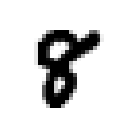

In [11]:
some_digit = X_train[54787].reshape(28,28)
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(2,2))
plt.imshow(some_digit, cmap=matplotlib.cm.binary)
plt.axis("off")


In [12]:
y_train[54787]

array([8])

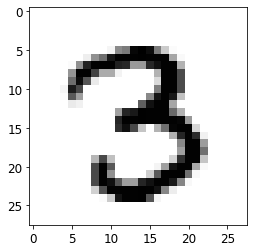

In [13]:
some_digit2 = X_train[4956].reshape(28,28)
plt.imshow(some_digit2, cmap=matplotlib.cm.binary)

In [14]:
y_train[4956]

array([3])

In [15]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [16]:
import os
os.makedirs('images/classification/', exist_ok=True)

Saving figure more_digits_plot


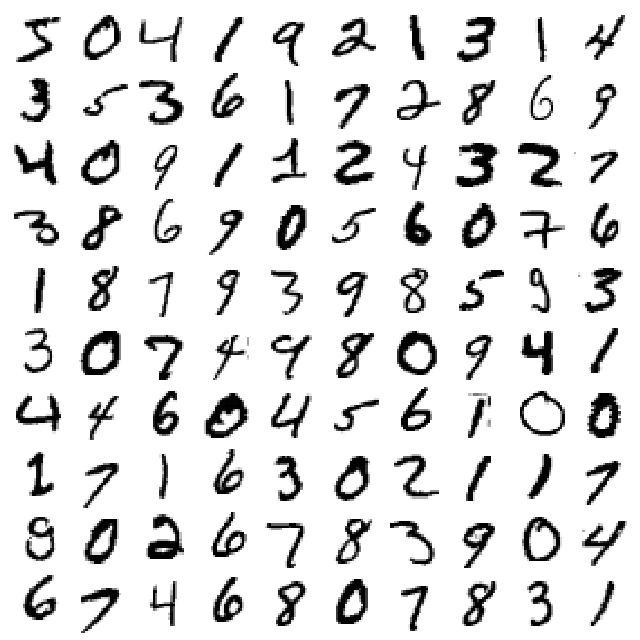

In [17]:
plt.figure(figsize=(9,9))
example_images = np.r_[X_train[:100]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [5]:
shuffle_index = np.random.permutation(len(y_train))
#shuffle_index.shape
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

## 2. 选择模型、训练模型（二元分类器）

*数据准备*

In [19]:
y_train

array([[7],
       [3],
       [8],
       ...,
       [0],
       [0],
       [4]])

In [20]:
from sklearn.utils.validation import column_or_1d
y_test_9 = y_test == 9
y_train_9 = y_train == 9
y_train_9.reshape(-1, 1)
#y_train_9 = column_or_1d(y, warn=True)
y_train_9 = column_or_1d(y_train_9, warn=True)
y_test_9 = column_or_1d(y_test_9, warn=True)
y_train_9.shape
y_train_9[y_train_9==False]

/home/ligy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/ligy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


array([False, False, False, ..., False, False, False])

* 分类问题的适用模型：
 * SGD 随机梯度下降（Stochastic Gredient Dscending)
 * Decistion Treee 决定树

In [21]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
model.fit(X_train, y_train_9)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
model.predict([X_train[54787]])

array([ True])

## 3. 对模型进行评估（二元分类器）

* 准确度 accuracy（不是很有效，尤其对有偏斜的数据）
* 混淆矩阵 confusion matrix （A实例被识别为B的次数）
* 精度（正类预测的准确率）
* 召回率、灵敏度、真正类率（检测到的正类比率）
* F1分数（精度与召回率的谐波平均），给予较小的值更大的权重
* 在召回率和精度之间平衡，以选择阀值：
 * 精度（召回率）-阀值曲线
 * 精度-召回率曲线（PR曲线）
* 比较多个模型的表现：
 * ROC曲线（受试者工作特征曲线、真正类率V.S.假正类率（1-特异度））
 * ROC AUC（ROC的曲线下面积）

### 3.1. 无验证集时直接得到的准确率

In [24]:
y_pred = model.predict(X_train)
y_pred.reshape(60000,1)
y_pred = y_pred[:, np.newaxis]
y_pred.shape

(60000, 1)

In [25]:
n_correct = sum(y_pred == y_train_9)
print(n_correct[0]/len(y_train)*100, "%")

85.67166666666667 %


### 3.2. 交叉验证，并用准确率来评估模型的性能（不是一个好指标）

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train_9, cv=3, scoring='accuracy')

array([0.94625, 0.94185, 0.9372 ])

*因为数据有偏斜，不能用准确率来评估*

### 3.3 评估分类器的更好方法

#### 3.3.1 混淆矩阵（A类被识别为B类的次数）

*首先要得到整个训练集上的预测，但为了保险起见，应该用交叉验证来取得一个干净的预测。（用以预测的数据集，训练时没见过）*

In [28]:
from sklearn.model_selection import cross_val_predict
y_pred2 = cross_val_predict(model, X_train, y_train_9, cv=3)

In [29]:
from sklearn.metrics import confusion_matrix
confusionmatrix = confusion_matrix(y_train_9, y_pred2)

In [30]:
confusionmatrix

array([[50927,  3124],
       [ 1078,  4871]])

#### 3.3.2 精度和召回率

In [34]:
from sklearn.metrics import precision_score, recall_score
precisionscore = precision_score(y_train_9, y_pred2)
recallscore = recall_score(y_train_9, y_pred2)

In [35]:
precisionscore

0.609255784865541

In [36]:
recallscore

0.8187930744662969

#### 3.3.3 F1分数（精度和召回率的组合）

*给较小的值更大的权重*

In [37]:
from sklearn.metrics import f1_score
f1score = f1_score(y_train_9, y_pred2)

In [38]:
f1score

0.6986517498565692

#### 3.3.4 更精细地平衡精度和召回率

##### 3.3.4.1 用以预测的决策分数

In [39]:
model.decision_function(X_train)

array([-5489.92579967, -3908.18820819, -1785.85686936, ...,
       -4944.47515012, -8124.66279856,  -859.82636859])

*SGDClassifier使用的阈值为0*

*预测时，最好用交叉验证！预测决策分数时也一样*

In [46]:
decision_score = cross_val_predict(model, X_train, y_train_9, method='decision_function',cv=3)

#### 3.3.4.2 P(R)依赖于阈值的曲线

*计算每个阈值对应的精度与召回率*

In [47]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_9, decision_score)

In [52]:
precisions.shape, recalls.shape, thresholds.shape

((57426,), (57426,), (57425,))

In [53]:
precisions, recalls, thresholds

(array([0.10359599, 0.10358038, 0.10358219, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99831905e-01, 9.99831905e-01, ...,
        3.36190956e-04, 1.68095478e-04, 0.00000000e+00]),
 array([-40556.93863681, -40542.91286244, -40542.06935803, ...,
         23086.07419866,  23097.0651451 ,  27673.87735997]))

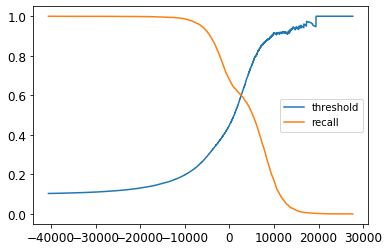

In [60]:
plt.plot(thresholds, precisions[:-1],label='threshold')
plt.plot(thresholds, recalls[:-1],label='recall')
plt.legend()

#### 3.3.4.3 PR曲线（precision/recall）

Text(0, 0.5, 'precisionrecall')

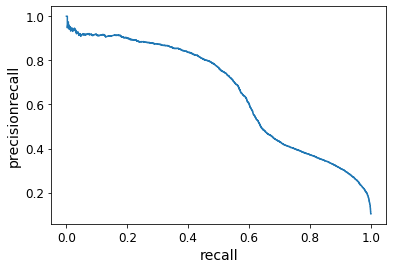

In [63]:
plt.plot(recalls, precisions)
plt.xlabel('recall')
plt.ylabel('precisionrecall')

* 从图中以P和R作为依据，得到某一阈值，如P=0.6,R=0.6,threshold=4000

In [67]:
y_pred_60 = (decision_score > 4000)
y_pred_60

array([False, False, False, ..., False, False, False])

In [68]:
precision_score(y_train_9, y_pred_60)

0.690234294007879

In [69]:
recall_score(y_train_9, y_pred_60)

0.5595898470331148

* PR曲线越靠近右上角，分类器越优秀

### 3.3.4 ROC曲线（受试者工作特征曲线）

In [70]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_9, decision_score)

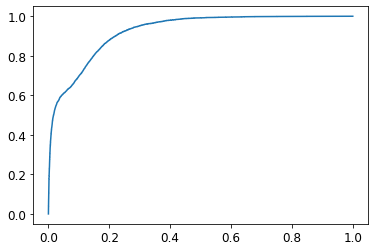

In [71]:
plt.plot(fpr, tpr)

* ROC曲线越靠近左上角，分类器越优秀

### 3.3.5 ROC AUC（ROC曲线下面积）

In [72]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9, decision_score)

0.9236164083142946

* ROC AUC 大于0.5小于1，越接近1越优秀

## 3.4 训练一个随机森林分类器，并比较随机梯度下降分类器的ROC曲线比较

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
model = RandomForestClassifier()
model
decision_score2 = cross_val_predict(model, X_train, y_train_9, cv=3, method='predict_proba')

In [84]:
decision_score2.shape

(60000, 2)

In [87]:
fpr2, tpr2, thresholds2 = roc_curve(y_train_9, decision_score2[:,1])

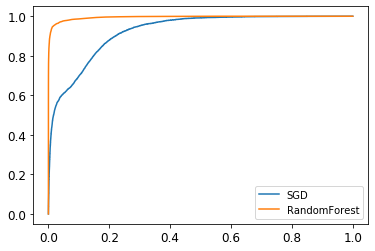

In [90]:
plt.plot(fpr, tpr,label='SGD')
plt.plot(fpr2, tpr2,label='RandomForest')
plt.legend()

In [93]:
roc_auc_score(y_train_9, decision_score2[:,1])

0.9952319845573712

## 3. 多分类问题

### 3.1 OvA策略（one v.s. rest）

* 对于N个分类，训练N个类对应二分类器
* 预测时，对于特定实例，选择分数高的分类器作为预测结果

### 3.2 OvO策略（one v.s. one)

* 为每一对分类训练一个二分类器
* 共有C_N^2个二分类器
* 优点：每个二分类器只需用到部分训练集
* 对于数据规模扩大时表现差的模型（如SVM分类器），应优先使用OvO

## 4. 练习

### 4.1

In [6]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier()
clf_KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
y_train.shape

(60000, 1)

In [10]:
from sklearn.utils.validation import column_or_1d
y_train = column_or_1d(y_train)
y_train.shape

(60000,)

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_KNN, X_train, y_train, scoring='accuracy', cv=3, njob=2)

array([0.96775, 0.9686 , 0.96855])

In [18]:
from sklearn.model_selection import RandomizedSearchCV
grid = {'n_neighbors':[3, 4, 5, 6, 7, 8], 'weights':['uniform', 'distance']}
clf_KNN = KNeighborsClassifier(n_jobs=-1)
grid_search = RandomizedSearchCV(clf_KNN, grid, n_jobs=-1, cv=3, scoring='accuracy')

In [19]:
grid_search.fit(X_train, y_train)

/home/ligy/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None, n_jobs=-1,
                                                  n_neighbors=5, p=2,
                                                  weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [3, 4, 5, 6, 7, 8],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=0)

In [24]:
scores = grid_search.cv_results_
scores

{'mean_fit_time': array([13.08010856, 11.54708966, 11.74438667, 12.79346577, 11.82703932,
        13.44047721, 13.24178092, 14.66770871, 15.31516409, 13.72571182]),
 'std_fit_time': array([1.27314062, 0.25788496, 1.68523796, 2.2249276 , 0.15681808,
        0.91626807, 0.65020281, 1.5543815 , 1.05760009, 2.04495867]),
 'mean_score_time': array([1259.3217725 , 1254.63388157, 1252.26760228, 1259.65526462,
        1232.2296718 , 1226.32715336, 1225.7589438 , 1223.70462163,
        1228.85471718,  820.83214657]),
 'std_score_time': array([2.31931272e-01, 4.71411666e+00, 5.11239404e+00, 7.84067070e-01,
        1.13936697e+00, 2.75420040e+00, 9.45180979e-01, 6.12536294e-01,
        2.12401959e+00, 2.88955173e+02]),
 'param_weights': masked_array(data=['uniform', 'uniform', 'distance', 'distance',
                    'distance', 'distance', 'uniform', 'uniform',
                    'distance', 'distance'],
              mask=[False, False, False, False, False, False, False, False,
            

In [27]:
for mean_test_score, params in zip(scores['mean_test_score'], scores['params']):
    print(mean_test_score, params)

0.9684333333333334 {'weights': 'uniform', 'n_neighbors': 4}
0.9668 {'weights': 'uniform', 'n_neighbors': 7}
0.9708 {'weights': 'distance', 'n_neighbors': 6}
0.9712666666666667 {'weights': 'distance', 'n_neighbors': 3}
0.9681000000000001 {'weights': 'distance', 'n_neighbors': 7}
0.9685833333333335 {'weights': 'distance', 'n_neighbors': 8}
0.96555 {'weights': 'uniform', 'n_neighbors': 8}
0.9675333333333334 {'weights': 'uniform', 'n_neighbors': 6}
0.9695666666666667 {'weights': 'distance', 'n_neighbors': 5}
0.9719166666666667 {'weights': 'distance', 'n_neighbors': 4}


In [20]:
grid_search.best_params_

{'weights': 'distance', 'n_neighbors': 4}

In [28]:
best_model = grid_search.best_estimator_
best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [30]:
from sklearn.model_selection import cross_val_predict
y_pred_best = cross_val_predict(best_model, X_train, y_train, cv=3)

In [31]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train, y_pred_best)

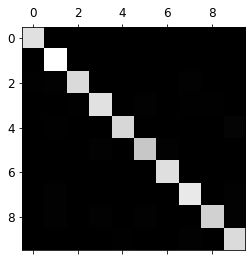

In [38]:
plt.matshow(conf_mat, cmap=plt.cm.gray)

In [40]:
row_nums = conf_mat.sum(axis=1, keepdims=True)
conf_mat_relat = conf_mat/row_nums

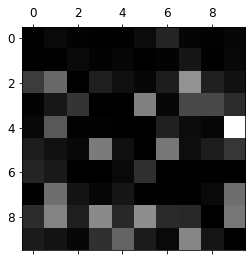

In [42]:
np.fill_diagonal(conf_mat_relat, 0)
plt.matshow(conf_mat_relat, cmap=plt.cm.gray)

#### 4.1.1 写入文件，Kaggle网站竞赛

In [4]:
from sklearn.neighbors import KNeighborsClassifier
best_KNN_clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [9]:
best_KNN_clf.fit(X_train, y_train)

/home/ligy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')

In [10]:
best_KNN_pred = best_KNN_clf.predict(X_test)

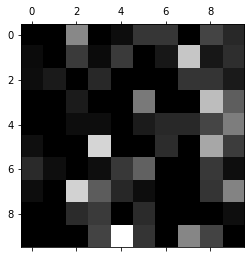

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
conf_mat_best_KNN = confusion_matrix(best_KNN_pred, y_test)
row_nums = conf_mat_best_KNN.sum(axis=1, keepdims=True)
conf_mat_relat_2 = conf_mat_best_KNN/row_nums
np.fill_diagonal(conf_mat_relat_2, 0)
plt.matshow(conf_mat_relat_2, cmap=plt.cm.gray)

In [18]:
import time

import pandas as pd

timestamp = time.strftime("%Y%m%d-%H%M%S")
number_predictions, = best_KNN_pred.shape
df = pd.DataFrame({"ImageId": range(1, number_predictions + 1), "Label": best_KNN_pred})
df.to_csv(f"random-forest-submission-{timestamp}.csv", index=False)

### 4.2 数据增广（训练集扩展）

In [5]:
def move_image_one_pixel(mnist_image, direction='right'):
    """
    Move MNIST image to four directions by one pixel.
    
    Parameters
    ----------
    mnist_image : ndarray
        The MNIST image to shift. Shape of ndarray is one row.
    
    direction : string
        Direction of the shift operation, default is 'right'.
        
    Returns
    -------
    new_image : ndarray
         The shifted image, same size as mnist_image.
         
    """
    from scipy.ndimage.interpolation import shift
    import numpy as np
    image = mnist_image.reshape(int(np.sqrt(np.prod(mnist_image.shape))), 
                                int(np.sqrt(np.prod(mnist_image.shape))))
    directions_into_shift = {'left':[0, -1], 'right':[0, 1], 'up':[-1, 0], 
                             'down':[1, 0]}
    new_image = shift(image, directions_into_shift[direction], cval=0)
    new_image = new_image.reshape(-1)
    return new_image

In [7]:
import pandas as pd
#train_set, test_set, train_label, test_label = load_data()
X_train = train_set.values
y_train = train_label.values
X_test = test_set.values
y_test = test_label.values

In [8]:
X_train_up = [move_image_one_pixel(mnist_image=x, direction='up') for x in X_train[:]]
X_train_down = [move_image_one_pixel(mnist_image=x, direction='down') for x in X_train[:]]
X_train_left = [move_image_one_pixel(mnist_image=x, direction='left') for x in X_train[:]]
X_train_right = [move_image_one_pixel(mnist_image=x, direction='right') for x in X_train[:]]

In [104]:
np.array(X_train_up).shape

(60000, 784)

In [105]:
np.array(y_train).shape

(60000, 1)

In [106]:
np.array(y_test).shape

(10000, 1)

In [9]:
X_train_extended = np.concatenate((X_train, X_train_up, X_train_down, X_train_left, X_train_right), axis=0)
y_train_extended = np.concatenate((y_train, y_train, y_train, y_train, y_train), axis=0)

In [108]:
X_train_extended.shape

(300000, 784)

In [109]:
y_train_extended.shape

(300000, 1)

In [10]:
best_model = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='distance')
scores_extended = cross_val_score(best_model, X_train_extended, y_train_extended, scoring='accuracy', cv=3)

/home/ligy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ligy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ligy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [11]:
scores_extended

array([0.98414, 0.98003, 0.97199])

In [12]:
scores_extended.mean()

0.97872

*Better performance than that on the original datasets 0.9719*

In [14]:
#y_pred_best_extended = cross_val_predict(best_model, X_train_extended, y_train_extended, cv=3)

In [16]:
scores_test = cross_val_score(best_model, X_test, y_test, scoring='accuracy', cv=3)

/home/ligy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ligy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/ligy/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [17]:
scores_test

array([0.91841632, 0.9429943 , 0.96189619])

### 4.2 Titanic 数据集

#### 4.2.1 Prepare the data

*Prepare the data*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
#train = pd.read_csv("../input/titanic/train.csv")
train = pd.read_csv("datasets/titanic/train.csv")

*Take a glasp of dataset*

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
data_val = pd.read_csv('datasets/titanic/test.csv')

In [117]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [118]:
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

*Check if there are repeated names*

In [4]:
name_count = train["Name"].value_counts().values

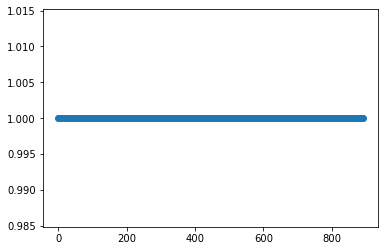

In [7]:
plt.scatter(range(len(name_count)), name_count)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [101]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
595,596,0,3,"Van Impe, Mr. Jean Baptiste",male,36.0,1,1,345773,24.1500,NaN,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138,9.8417,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,S
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.5000,NaN,Q
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,11755,39.6000,A16,C
750,751,1,2,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S


In [30]:
#train.isna().any()

In [103]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train.columns[train.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [22]:
train.columns[train.notna().any()]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [104]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [32]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

*Show digital data in figures*

In [154]:
train_label = train["Survived"]
y_train = train_label.values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faafbc4f198>,
      dtype=object)

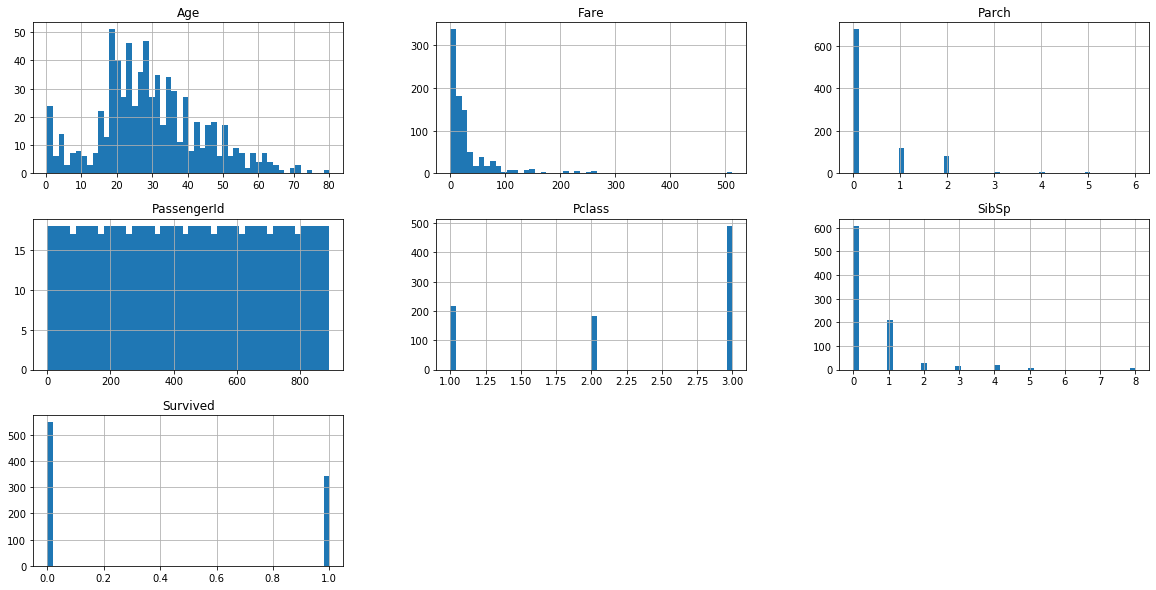

In [155]:
train.hist(bins=50,figsize=(20,10))

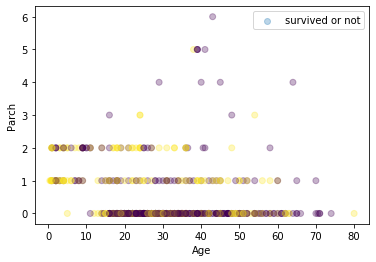

In [156]:
plt.scatter(train["Age"], train["Parch"], c=train_label, alpha=0.3,label='survived or not')
plt.xlabel("Age")
plt.ylabel("Parch")
plt.legend()

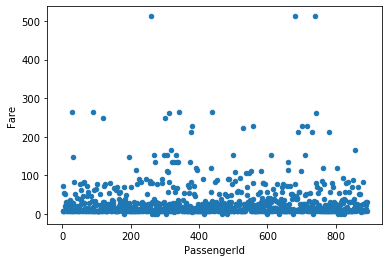

In [157]:
train.plot(kind='scatter',x='PassengerId',y='Fare')

*Clean the data*

In [158]:
train_feat = train.drop("Survived", axis=1)
#train_feat.info()

In [159]:
data_cleaner = [train_feat, data_val]

In [160]:
for data in data_cleaner:
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [161]:
exclude_index = ['PassengerId', 'Ticket', 'Cabin']
train_feat.drop(exclude_index, axis=1, inplace=True)

In [162]:
train_feat.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [163]:
data_val.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [191]:
train_feat['Name'].sample(10)

310                     Hays, Miss. Margaret Bechstein
67                            Crease, Mr. Ernest James
802                Carter, Master. William Thornton II
186    O'Brien, Mrs. Thomas (Johanna "Hannah" Godfrey)
5                                     Moran, Mr. James
859                                   Razi, Mr. Raihed
390                         Carter, Mr. William Ernest
647                Simonius-Blumer, Col. Oberst Alfons
261                  Asplund, Master. Edvin Rojj Felix
446                  Mellinger, Miss. Madeleine Violet
Name: Name, dtype: object

In [236]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Alone'] = 1
    dataset['Alone'].loc[dataset['FamilySize'] > 1] = 0 
    dataset['Title'] = dataset['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
    #dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_name[x] else x)

In [193]:
train_feat[['Alone', 'FamilySize', 'SibSp', 'Parch', 'Title']].sample(10)

,Alone,FamilySize,SibSp,Parch,Title
705,1,1,0,0,Mr
783,0,4,1,2,Mr
197,0,2,0,1,Mr
27,0,6,3,2,Mr
628,1,1,0,0,Mr
731,1,1,0,0,Mr
561,1,1,0,0,Mr
187,1,1,0,0,Mr
457,0,2,1,0,Mrs
545,1,1,0,0,Mr


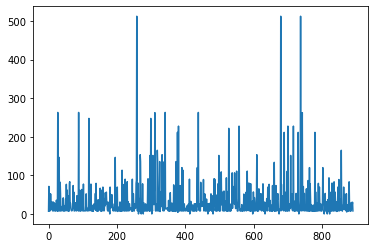

In [198]:
train_feat['Fare'].plot()

In [237]:
title_name = train_feat['Title'].value_counts() < 10
#title_name['Mr']
title_name

Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Col              True
Mlle             True
Major            True
Sir              True
Ms               True
Don              True
Lady             True
Capt             True
Mme              True
the Countess     True
Jonkheer         True
Name: Title, dtype: bool

In [238]:
train_feat['Title'] = train_feat['Title'].apply(lambda x: 'Misc' if title_name[x] else x)

In [240]:
train_feat['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [244]:
from sklearn.preprocessing import LabelEncoder 
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [245]:
train_feat.isna().sum()

Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
Alone            0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64

In [246]:
data_val.isna().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilySize         0
Alone              0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
dtype: int64

In [251]:
train[['Sex', 'Survived']].groupby('Sex',as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


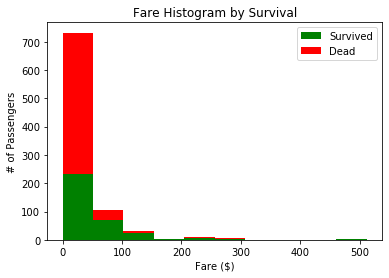

In [256]:
plt.hist(x = [train[train['Survived']==1]['Fare'], train[train['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

## 5. Appendix

*change ND to 1D*

In [45]:
#a = move_image_one_pixel(X_train[0],'up').reshape(28,28)
a = np.random.rand(3,4,5,2)
b = a.ravel()#view of a, not copy
print(b.shape, a.ravel().shape)
c = a.reshape(-1)
d = a.flatten()
print(c.shape, d.shape, a.shape)
np.prod(a.shape)

(120,) (120,)
(120,) (120,) (3, 4, 5, 2)


120

*Extend array*

In [72]:
a = np.arange(6).reshape(2, 3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [78]:
b = np.append(a, np.arange(6).reshape(2, 3), axis=0)
b

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])

In [81]:
np.concatenate((a, a, b), axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5],
       [0, 1, 2],
       [3, 4, 5]])